House Price prediction Regression Project

Project Goal

Predict the prices of the houses and apartments by its features. If you're a buyer or a seller of the city but you don't know the exact price of the house then this model can be helpful for you,so supervised learning regression algorithm can help you to predict the price of the house just by providing features of the target house

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import sklearn as sk


In [2]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [3]:
df_train.shape


(1460, 81)

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
df=pd.concat([df_train,df_test])
df.shape

(2919, 81)

In [8]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


 Get brief info of our Data set

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [11]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [12]:
int_features=df.select_dtypes(include=['int64']).columns
int_features


Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [13]:
print("TOtal number of integer features :",int_features.shape[0])
print("Integer feature names ", int_features.tolist())

TOtal number of integer features : 26
Integer feature names  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [14]:
float_features=df.select_dtypes(include=['float64']).columns
print("TOtal number of float features :",float_features.shape[0])
print("Float feature names ", float_features.tolist())

TOtal number of float features : 12
Float feature names  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [15]:
cat_features=df.select_dtypes(include=['object']).columns

print("TOtal number of integer features :",cat_features.shape[0])
print("Integer feature names ", cat_features.tolist())

TOtal number of integer features : 43
Integer feature names  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Getting the statistical info about the data

In [16]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [17]:
df.describe().shape

(8, 38)

In [18]:
#Handling null/missing values

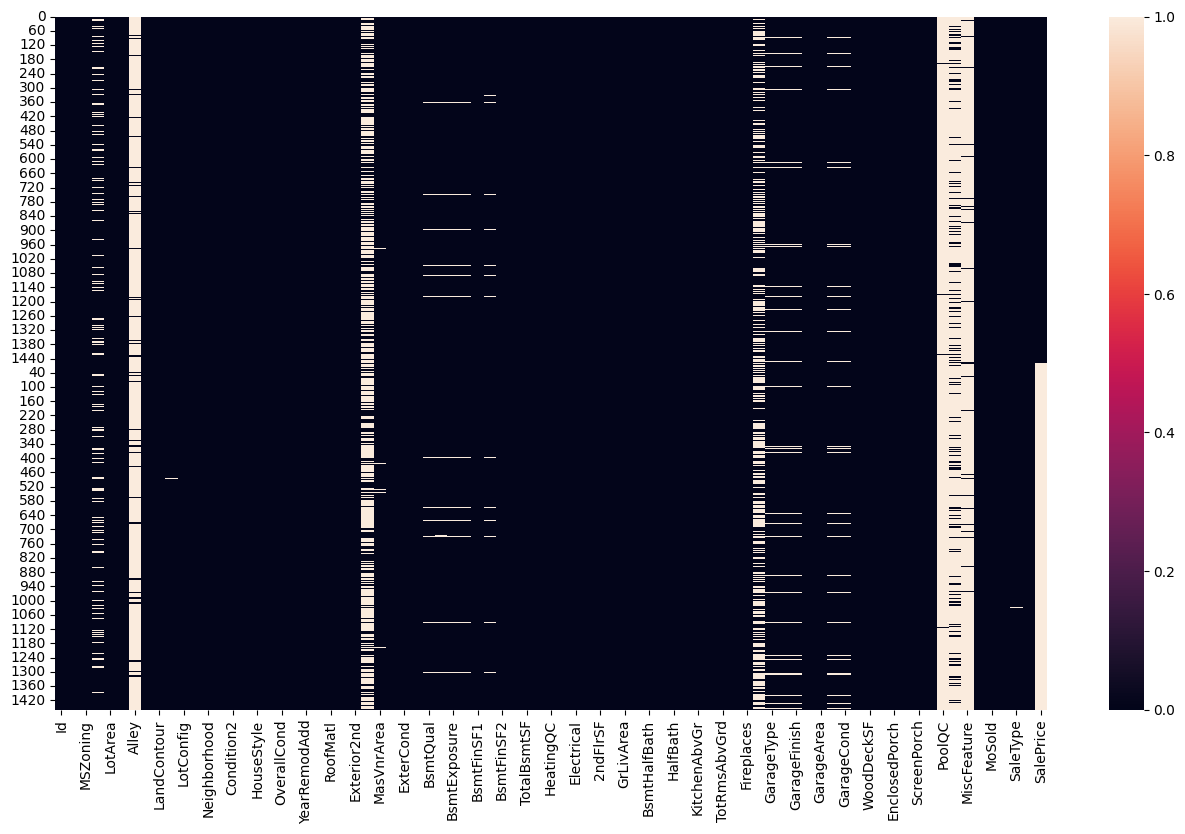

In [19]:
plt.figure(figsize=(16,9))
sb.heatmap(df.isnull())
plt.savefig("Img/heatmap_null_values.png")

In [20]:
#Percentage of NULL values

In [21]:
null_perc=df.isnull().sum()/df.shape[0]*100
null_perc

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

In [22]:
miss_val_per=null_perc[null_perc>50]
miss_val_per

Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [23]:
#These above columnns have null values as given valuein percentage..as alley has 93.21% missing values 

'''As per the domain knowledge we will not drop those features instead 
None value we will add constant value'''

In [24]:
miss_val_20_50=null_perc[(null_perc>20)& null_perc<50]
miss_val_20_50

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

In [25]:
miss_val_5_20=null_perc[(null_perc>5)& null_perc<20]
miss_val_5_20

Id                0.000000
MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 81, dtype: float64

<Axes: >

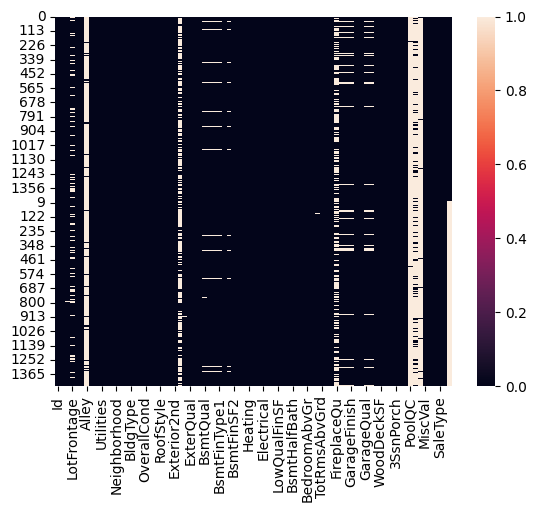

In [26]:
sb.heatmap(df[miss_val_5_20.keys()].isnull())

Getting the NULL value percentage for every feature

In [27]:
df=df.set_index("Id")

In [28]:
null_cnt=df.isnull().sum()
null_cnt

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 80, dtype: int64

In [29]:
null_perc=df.isnull().sum()/df.shape[0]*100
null_perc

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.034258
SaleCondition     0.000000
SalePrice        49.982871
Length: 80, dtype: float64

In [30]:
miss_val_5_20=null_perc[(null_perc>5)&(null_perc<21)]
miss_val_5_20


LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

 MIssing Values Imputation

In [31]:
missing_val=null_perc[null_perc>0]
print(len(missing_val))

35


# MISSING VALUE imputation

In [32]:
missing_val

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [33]:
cat_fet=missing_val[missing_val.keys().isin(cat_features)]
print("Number of the cat features ", len(cat_fet))
cat_fet

Number of the cat features  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [34]:
int_fet=missing_val[missing_val.keys().isin(int_features)]
print("Number of the cat features ", len(int_fet))
int_fet

Number of the cat features  0


Series([], dtype: float64)

In [35]:
float_fet=missing_val[missing_val.keys().isin(float_features)]
print("Number of the cat features ", len(float_fet))
float_fet

Number of the cat features  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

In [36]:
#IMputing MSZoning=0.137033

In [37]:
df["MSZoning"].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

# In categorical dtype we impute values in missing place which has higher frequency like mode  

In [38]:
#Backp of the original data
df_mci=df.copy()
df_mci.shape

(2919, 80)

In [39]:
mszone_mode=df["MSZoning"].mode()[0]
df_mci["MSZoning"].replace(np.nan, mszone_mode,inplace=True)
df_mci["MSZoning"].isnull().sum()

0

In [40]:
## Handling ALley= 93.216855

In [41]:
df_mci["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [42]:
alley_cnt="NA"
df_mci["Alley"].replace(np.nan,alley_cnt,inplace=True)
df_mci["Alley"].isnull().sum()

0

In [43]:
#Handling LotFrontage=16.649538

In [44]:
LotFrontage_mean=df["LotFrontage"].mean()
LotFrontage_mean

69.30579531442663

In [45]:
df_mci["LotFrontage"].replace(np.nan,LotFrontage_mean,inplace=True)

In [46]:
df_mci["LotFrontage"].isnull().sum()

0

#Utilities missing values...

In [47]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [48]:
utilities_mode=df_mci["Utilities"].mode()[0]
df_mci["Utilities"].replace(np.nan,utilities_mode,inplace=True)

In [49]:
df_mci["Utilities"].isnull().sum()

0

In [50]:
# HAndling Exterior1st      0.034258
#Exterior2nd      0.034258

In [51]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [52]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [53]:
#AS both Exterior1 and 2 are categorical so we'll add mode value

In [54]:
ex1_mode=df_mci["Exterior1st"].mode()[0]
df_mci["Exterior1st"].replace(np.nan,ex1_mode,inplace=True)

In [55]:
df_mci["Exterior1st"].isnull().sum()

0

In [56]:
ex2_mode=df_mci["Exterior2nd"].mode()[0]
df_mci["Exterior2nd"].replace(np.nan,ex2_mode,inplace=True)

In [57]:
df_mci["Exterior2nd"].isnull().sum()

0

In [58]:
### Handling MasVnrType and MasVnrArea

In [59]:
masvnrtype_mode=df["MasVnrType"].mode()[0]
df_mci["MasVnrType"].replace(np.nan,masvnrtype_mode,inplace=True)

In [60]:
df_mci["MasVnrType"].isnull().sum()

0

In [61]:
masvnrarea_mode=0
df_mci["MasVnrArea"].replace(np.nan,masvnrarea_mode,inplace=True)

In [62]:
df_mci["MasVnrArea"].isnull().sum()

0

In [63]:
###  Handling Basement values

In [64]:
Cat_feat_bms=["BsmtQual",         
"BsmtCond",        
"BsmtExposure",    
"BsmtFinType1",     
"BsmtFinType2"]   

num_bsmt=["BsmtFinSF1",       
"BsmtFinSF2",     
"BsmtUnfSF",      
"TotalBsmtSF",    
"BsmtFullBath",   
"BsmtHalfBath"]   

In [65]:
bsmt_cnt="NA"
for feat in Cat_feat_bms:
    df_mci[feat].replace(np.nan,bsmt_cnt,inplace=True)

In [66]:
df_mci[Cat_feat_bms].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

 Feature transformation=>converting the categorical data to numerical data

In [67]:
feat_num_con=["MSSubClass", "YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]

for i in feat_num_con:
    print(f"(i):data Type={df_mci[i].dtype}")

(i):data Type=int64
(i):data Type=int64
(i):data Type=int64
(i):data Type=float64
(i):data Type=int64
(i):data Type=int64


In [68]:
df_mci[feat_num_con].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [69]:
df_mci["MoSold"].unique()  #Gives the number corresponding to month number

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [70]:
import calendar


In [71]:
calendar.month_abbr[2]

'Feb'

In [72]:
 # Now we have to convert the array MoSOld into months of ayear

In [73]:
df_mci['MoSold'] = df_mci['MoSold'].apply(lambda x: calendar.month_abbr[x])


In [74]:
df_mci["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [75]:
for fet in feat_num_con:
    df_mci[fet]=df_mci[fet].astype(str)
    

In [76]:
for i in feat_num_con:
    print(f"(i):data Type={df_mci[i].dtype}")
    

(i):data Type=object
(i):data Type=object
(i):data Type=object
(i):data Type=object
(i):data Type=object
(i):data Type=object


Ordinal Encoding

In [77]:
ordinal_end=[
    "ExterQual",
    "ExterCond",
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinSF1",
    "BsmtFinType2",
    "HeatingQC",
    "KitchenQual",
    "FireplaceQu",
    "GarageQual",
    "GarageCond",
    "PoolQC",
    "Functional",
    "GarageFinish",
    "PavedDrive",
    "Utilities"
]

In [78]:
print("total number of features to convert to ordinal numerical format ",len(ordinal_end))

total number of features to convert to ordinal numerical format  18


In [79]:
df_mci["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [80]:
from pandas.api.types import CategoricalDtype

In [81]:
#CategoricalDtype
df_mci["ExterQual"]=df_mci["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
#df_mci["ExterQual"]

In [82]:
df_mci["ExterQual"].unique()

array([3, 2, 4, 1], dtype=int8)

In [83]:
df_mci["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [84]:
df_mci["BsmtExposure"]=df_mci["BsmtExposure"].astype(CategoricalDtype(categories=["No","Av","Gd","Mn","NA"],ordered=True)).cat.codes


In [85]:
df_mci["ExterCond"].value_counts()
df_mci["BsmtQual"].value_counts()
df_mci["BsmtCond"].value_counts()
df_mci["BsmtFinType1"].value_counts()
df_mci["BsmtFinSF1"].value_counts()
df_mci["BsmtFinType2"].value_counts()
df_mci["HeatingQC"].value_counts()
df_mci["KitchenQual"].value_counts()
df_mci["FireplaceQu"].value_counts()

BsmtExposure
0    1904
1     418
2     276
3     239
4      82
Name: count, dtype: int64